In [41]:
# import csv
import csv
from pprint import pprint

# import pi greco from math
from math import pi

import matplotlib.pyplot as plt
import numpy as np

In [62]:
# import data
TIMES = []
Qs = []
DHs = []
with open('data/data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #next(reader, None)  # skip the headers
    for row in reader:
        TIMES.append(int(row['TIME(min)']))
        print(row['Q(L/min)'])
        Qs.append(round(float(row['Q(L/min)'])/1000, 10))
        #Qs.append(float(row['Q(L/min)']))
        DHs.append(float(row['dh(m)']))
    
print('TIMES: ', TIMES)
print('Qs: ', Qs)
print('DHs: ', DHs)

3.60
7.65
12.00
14.28
15.20
21.80
23.41
24.50
27.80
29.40
TIMES:  [25, 20, 15, 18, 17, 17, 11, 15, 13, 10]
Qs:  [0.0036, 0.00765, 0.012, 0.01428, 0.0152, 0.0218, 0.02341, 0.0245, 0.0278, 0.0294]
DHs:  [1.11, 2.36, 4.0, 4.9, 5.02, 7.63, 8.13, 8.58, 9.86, 10.89]


In [63]:
# Data:
# L = Lenght of the pipe
# D = Diameter of the pipe

L = 0.58
D = 0.35

# Convert Diameter to Cicle Area
A = round((pi * D**2) / 4, 3)
print('A: ', A, " m^2")

A:  0.096  m^2


In [64]:
# i = hydraulic gradient(dh)
# K = Q(m^3/min) / A(m^2) * dq(m)/L(m)

In [65]:
def idraulic_resistance(Q, A, i):
    return round(Q / (A * i), 4)

In [73]:
results = []
Is = []
SDs = []
for Q, DH in zip(Qs, DHs):
    i = round(DH / L, 1)
    Is.append(i)
    SDs.append(Q/A)
    print('i: ', i)
    print('A: ', A)
    print('Q: ', Q)
    K = idraulic_resistance(Q, A, i)
    print('K: ', K)
    print('----------------')
    results.append(K)

i:  1.9
A:  0.096
Q:  0.0036
K:  0.0197
----------------
i:  4.1
A:  0.096
Q:  0.00765
K:  0.0194
----------------
i:  6.9
A:  0.096
Q:  0.012
K:  0.0181
----------------
i:  8.4
A:  0.096
Q:  0.01428
K:  0.0177
----------------
i:  8.7
A:  0.096
Q:  0.0152
K:  0.0182
----------------
i:  13.2
A:  0.096
Q:  0.0218
K:  0.0172
----------------
i:  14.0
A:  0.096
Q:  0.02341
K:  0.0174
----------------
i:  14.8
A:  0.096
Q:  0.0245
K:  0.0172
----------------
i:  17.0
A:  0.096
Q:  0.0278
K:  0.017
----------------
i:  18.8
A:  0.096
Q:  0.0294
K:  0.0163
----------------


In [67]:
print('K: ')
pprint(results)

K: 
[0.0197, 0.0194, 0.0181, 0.0177, 0.0182, 0.0172, 0.0174, 0.0172, 0.017, 0.0163]


Interpolation: 
slope:  0.01614686063248754


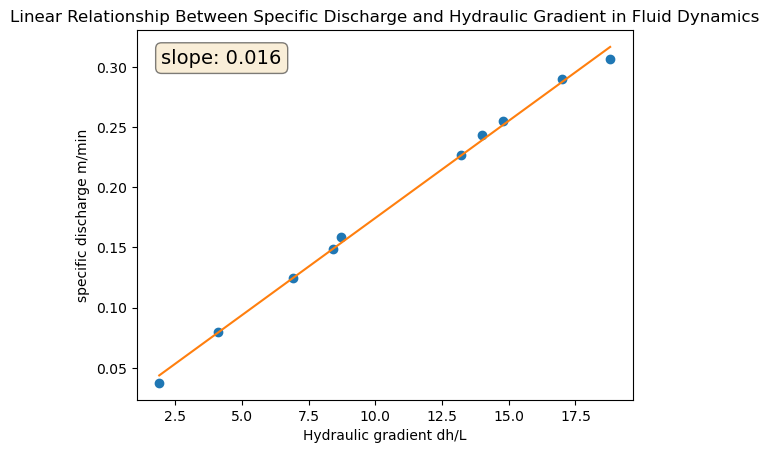

In [97]:
# calculate and plot the linear regression


# calculate the linear regression
x = np.array(Is)
y = np.array(SDs)
m, b = np.polyfit(x, y, 1)

# Print the results of the interpolation
print('Interpolation: ')


# print the slope and intercept
print('slope: ', m)

# plot the linear regression
fig, ax = plt.subplots()
# plot title
plt.title('Linear Relationship Between Specific Discharge and Hydraulic Gradient in Fluid Dynamics')
# x label hidraulic gradient
plt.xlabel('Hydraulic gradient dh/L')
# y label specific discharge
plt.ylabel('specific discharge m/min')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, f"slope: {round(m,3)}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


ax.plot(x, y, 'o')
ax.plot(x, m*x + b)
plt.show()




Text(0.5, 0.5, 'Specific discharge m/min')

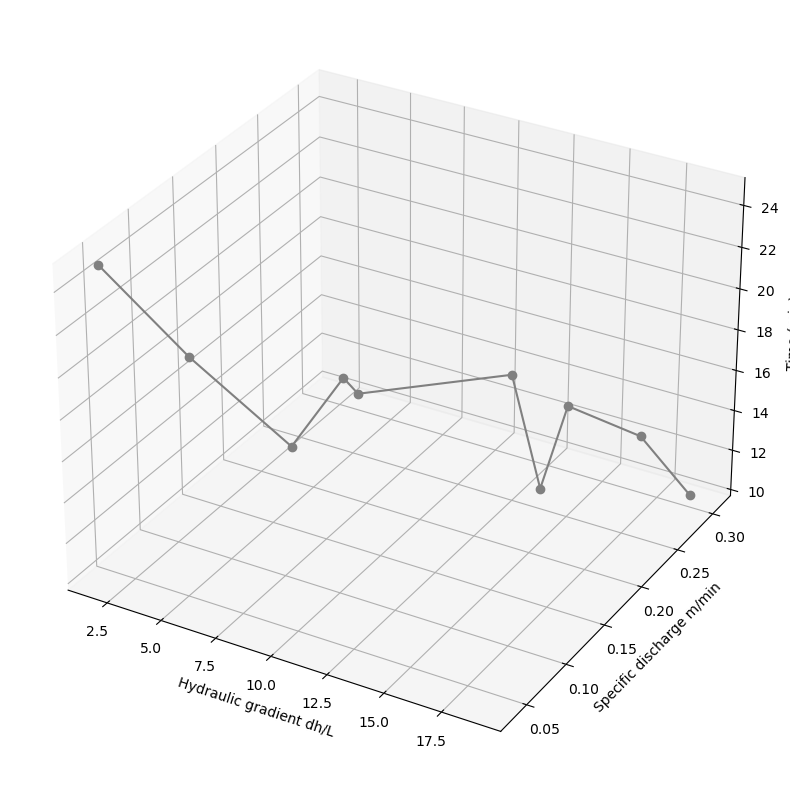

In [125]:
# plot a 3d graph about the relationship between hydraulic gradient and specific discharge and time

fig = plt.figure(figsize=(18, 10))
ax = plt.axes(projection='3d')

# plot hydralic gradient
#ax.scatter(x, TIMES, y, c='r', marker='o')
ax.plot3D(x, y, TIMES, 'gray', marker='o')


ax.set_xlabel('Hydraulic gradient dh/L')
ax.set_zlabel('Time (min)')
ax.set_ylabel('Specific discharge m/min')


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

# Assuming x, y, TIMES are your data

def plot_3d(elev=0, azim=0):
    fig = plt.figure(figsize=(18, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.plot3D(x, y, TIMES, 'gray', marker='o')
    ax.set_xlabel('Hydraulic gradient dh/L')
    ax.set_zlabel('Time (min)')
    ax.set_ylabel('Specific discharge m/min')
    plt.show()

interact(plot_3d, elev=(-90, 90), azim=(-90, 90))

interactive(children=(IntSlider(value=0, description='elev', max=90, min=-90), IntSlider(value=0, description=…

<function __main__.plot_3d(elev=0, azim=0)>